# Contour Analysis

## Import Libraries

In [23]:
import cv2
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Read Image

(-0.5, 299.5, 299.5, -0.5)

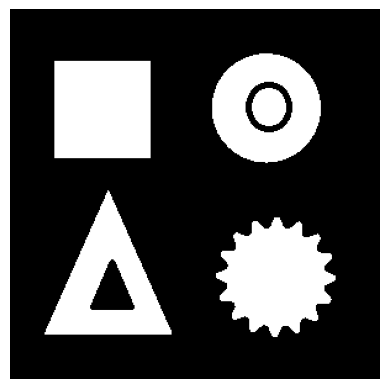

In [8]:
image = cv2.imread('images/shapes.png')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Find and draw Contours

(-0.5, 299.5, 299.5, -0.5)

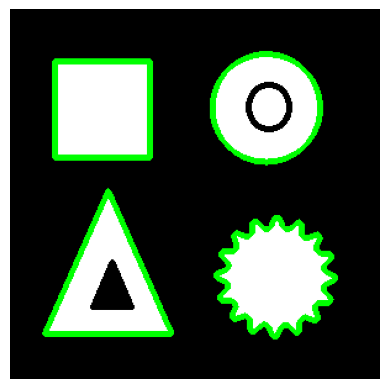

In [9]:
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Contours
contours, hierarchy = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw Contours
cv2.drawContours(draw_image, contours, -1, (0, 255, 0), 3)

# Display Image
plt.imshow(draw_image)
plt.axis('off')

### Once detected they can be further analyzed for their properties


In [10]:
# Select a contour
contour = contours[1]

# Get its moments
M = cv2.moments(contour)

# Print all Moments
print(M)

{'m00': 5989.0, 'm10': 474646.0, 'm01': 1343253.0, 'm20': 40271627.83333333, 'm11': 106455299.5, 'm02': 305761478.1666666, 'm30': 3612359060.0, 'm21': 9073234845.966667, 'm12': 24231834439.333332, 'm03': 70521711090.90001, 'mu20': 2654525.5932264626, 'mu11': -1481.838787779212, 'mu02': 4487705.91604048, 'mu30': -44842.82609272003, 'mu21': 41079527.165201545, 'mu12': -4197.684742808342, 'mu03': -69584902.00160217, 'nu20': 0.07400793571613253, 'nu11': -4.131353264307356e-05, 'nu02': 0.12511683887874922, 'nu30': -1.615500855213816e-05, 'nu21': 0.014799248185193237, 'nu12': -1.5122515422875585e-06, 'nu03': -0.025068551313229503}


### Find Center of Contour

In [11]:
# Calculate the X-cordinate of the centroid
cx = int(M['m10']/M['m00'])

# Calculate the Y-cordinate of the centroid
cy = int(M['m01']/M['m00'])

# print the centroid point
print(f"Centroid: {cx, cy}")

Centroid: (79, 224)


### Now Retrieving centroid point for all contours


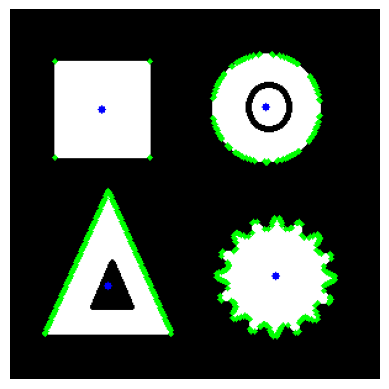

In [12]:
draw_image = image.copy()

for contour in contours:
    M = cv2.moments(contour)
    cx,cy = int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])
    cv2.circle(draw_image,(cx,cy), 3, (0,0,255), -1)
    cv2.drawContours(draw_image,contour,-1, (0,255,0), 3)

plt.imshow(draw_image);
plt.axis("off");

In [13]:
print(len(contours))

4


### Finding Contour Area

In [14]:
contour = contours[1]
# Get Area
area_method1 = cv2.contourArea(contour)

print(f"Area using Method 1: {area_method1}")

Area using Method 1: 5989.0


### Another Method

In [15]:
M = cv2.moments(contour)

# Get the moment containing Area
area_method2 = M['m00']
print(f"Area using Method 2: {area_method2}")

Area using Method 2: 5989.0


## Contour Properties

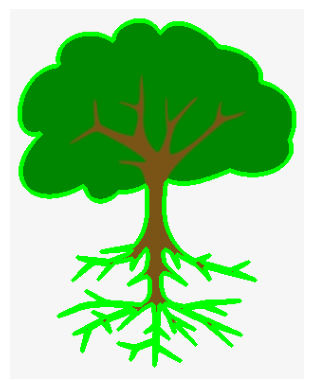

In [17]:
image = cv2.imread("images/tree.png")

# Create a copy
draw_image = image.copy()

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a Binary Threshold
_, binary_image = cv2.threshold(gray_image, 225, 255, cv2.THRESH_BINARY_INV)

# Detect and draw external contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select a contour
contour = contours[0]

# Draw the selected contour
cv2.drawContours(draw_image, [contour], -1, (0, 255, 0), 3)

# Display the result
plt.imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB))
plt.axis("off");

### Aspect ratio

In [19]:
# Get the up right bounding rectangele for the image
x, y, w, h = cv2.boundingRect(contour)

# Aspect Ratio
aspect_ratio = float(w) / h
print(f"Aspect Ratio: {aspect_ratio}")

Aspect Ratio: 0.7945205479452054


### Extent 

Extent is the ratio of contour area to bounding rectangular area

In [20]:
# Calculate the area of contour
original_area = cv2.contourArea(contour)

# Find the bounding rectangle for the contour
x, y, w, h = cv2.boundingRect(contour)

# Calculate the area of the bounding rectangle
rect_area = w * h

# Calculate the extent
extent = float(original_area) / rect_area
print(f"Extent: {extent}")

Extent: 0.4392678318375059


### Hu Moments

Hu moments are a set of 7 numbers calculated using the central moments. The first 6 of the Hu moments are invariant to translation, scaling, rotation and reflection. The 7th Hu moment is also invariant to these transformation, except that it changes its sign in case of reflection. Below we will calculate the HU moments

In [21]:
### Calcualte Moments
M = cv2.moments(contour)

### Calculate Hu Moments
hu_M = cv2.HuMoments(M)

print(hu_M)

[[ 2.13277059e-01]
 [ 2.97400384e-05]
 [ 1.90278062e-03]
 [ 9.58802183e-04]
 [ 1.20700069e-06]
 [-3.05478647e-06]
 [ 4.69376412e-07]]


Tranforming to log ranges as range for each values are different

In [22]:
for i in range(len(hu_M)):
    hu_M[i] = -1* math.copysign(1.0, hu_M[i]) * math.log10(abs(hu_M[i]))

df = pd.DataFrame(hu_M,columns=['Hu_Moments of original Image'])
df

C:\Users\user\AppData\Local\Temp\ipykernel_9204\865851135.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hu_M[i] = -1* math.copysign(1.0, hu_M[i]) * math.log10(abs(hu_M[i]))


,Hu_Moments of original Image
0,0.671056
1,4.526658
2,2.720611
3,3.018271
4,5.918292
5,-5.515019
6,6.328479
